# SVM Classifier Tutorial 

## import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import warnings

warnings.filterwarnings('ignore')

## import datasets

In [ ]:
data = 'pulsar_stars.csv'

df = pd.read_csv(data)

In [ ]:
# view dimensions of dataset

df.shape

(12528, 9)

# EDA

In [ ]:
# let's preview the dataset

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [ ]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [ ]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

In [ ]:
# view column names again

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [ ]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [ ]:
# view the renamed column names

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [ ]:
# check distribution of target_class column

df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [ ]:
# view the percentage distribution of target_class column

df['target_class'].value_counts()/np.float(len(df))

0.0    0.907966
1.0    0.092034
Name: target_class, dtype: float64

In [ ]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [ ]:
# check for missing values in variables

df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

In [ ]:
# remove null data

df.dropna(inplace=True, axis=0)
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [ ]:
# view summary statistics in numerical variables

round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00
mean,111.13,46.51,0.48,1.79,12.74,26.33,8.33,105.78,0.09
std,25.69,6.78,1.07,6.29,29.77,19.54,4.55,108.17,0.29
min,6.19,24.77,-1.74,-1.79,0.21,7.37,-2.64,-1.98,0.00
25%,100.98,42.40,0.02,-0.19,1.91,14.38,5.79,34.92,0.00
50%,115.23,46.90,0.22,0.20,2.80,18.44,8.43,83.15,0.00
75%,127.33,51.00,0.47,0.93,5.46,28.39,10.72,139.77,0.00
max,189.73,91.81,8.07,68.10,211.95,110.64,34.54,1191.00,1.00


Text(0, 0.5, 'DM-SNR Skewness')

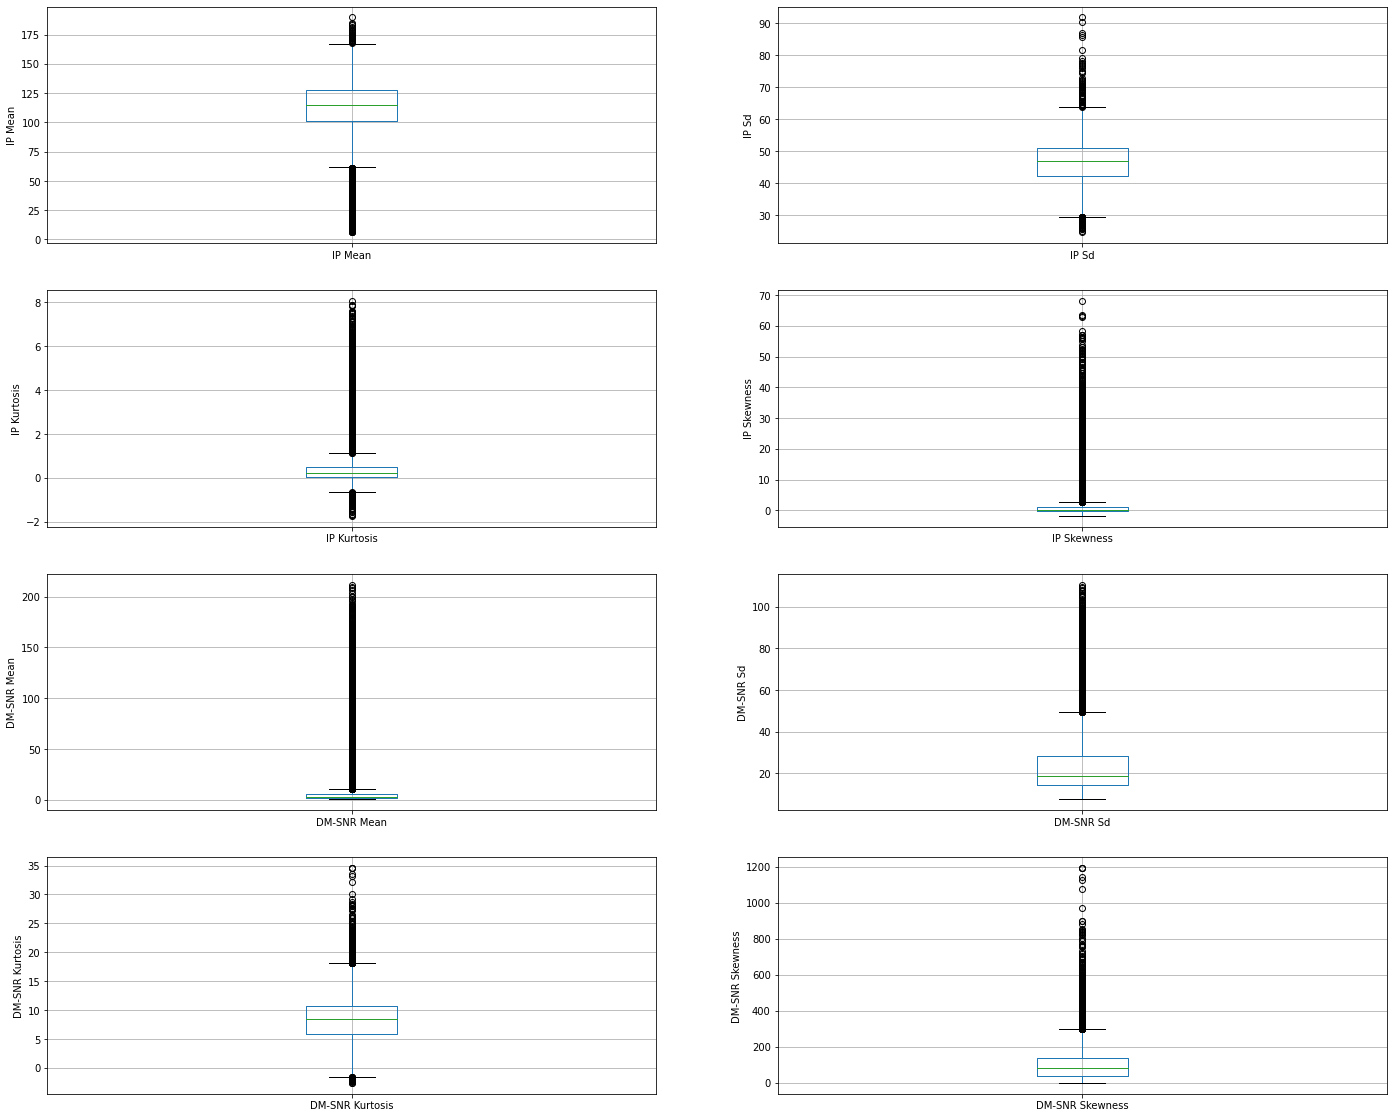

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Text(0, 0.5, 'Number of pulsar stars')

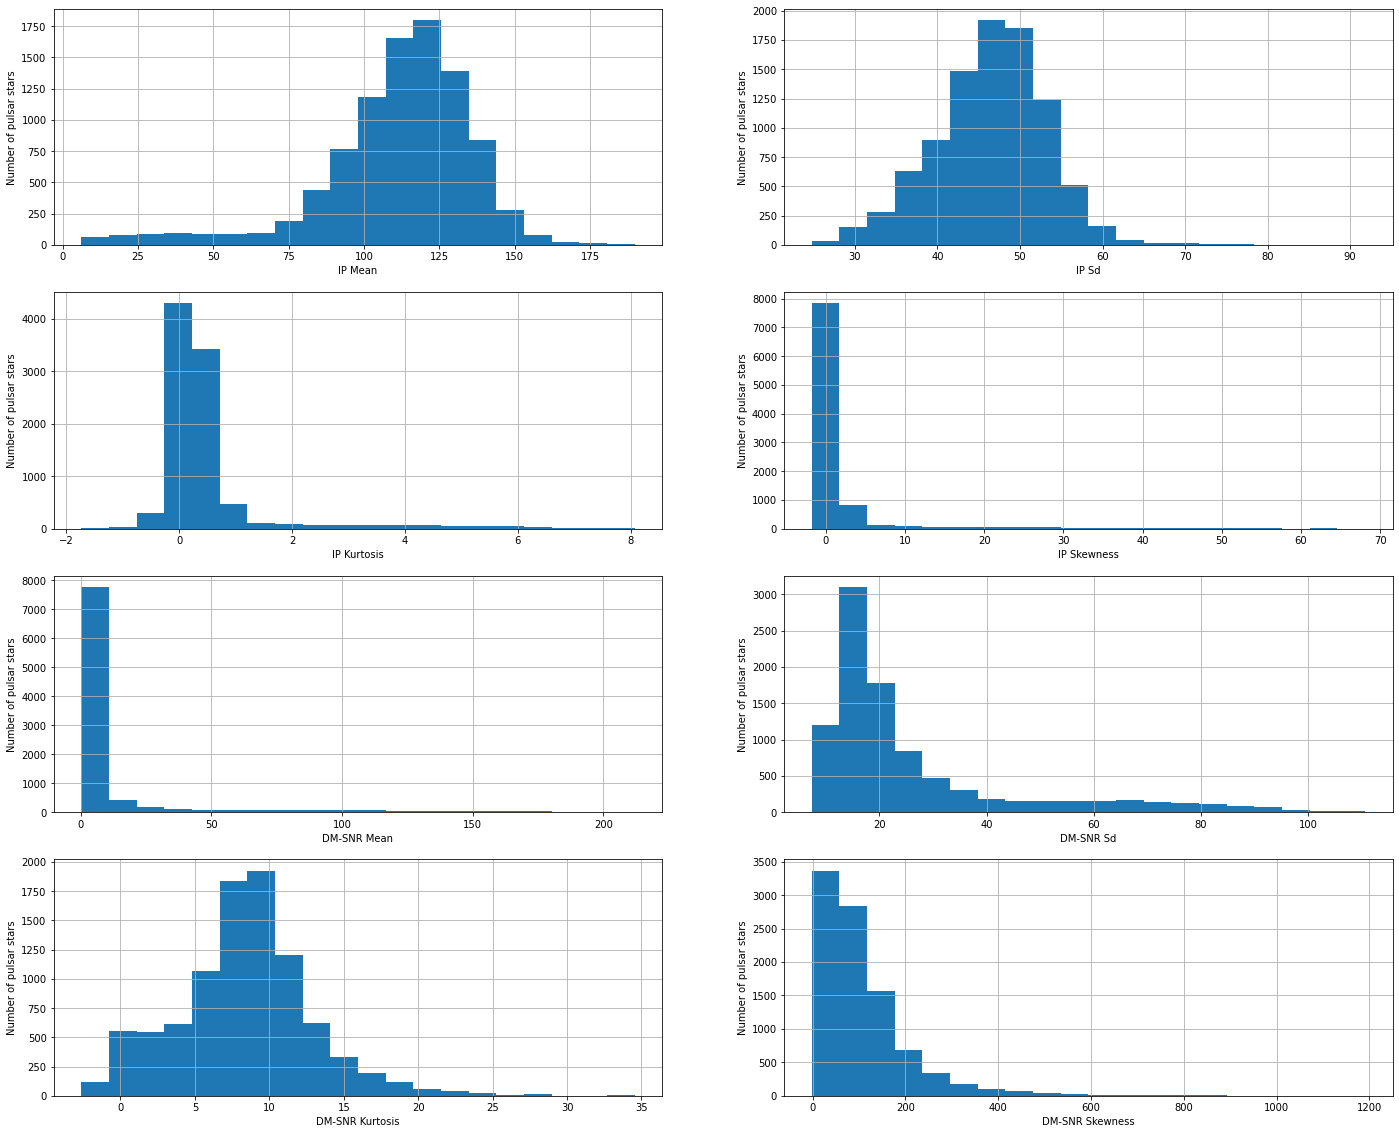

In [ ]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

In [ ]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

## data train test split

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((7418, 8), (1855, 8))

##feature scaling

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03
mean,1.518811e-16,2.808971e-16,-9.069016e-17,-5.567578e-18,-7.671135e-17,-7.034306e-18,-2.971672e-16,-2.311593e-17
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-4.062595e+00,-3.195114e+00,-2.039801e+00,-5.630418e-01,-4.201420e-01,-9.704665e-01,-2.413736e+00,-9.966851e-01
25%,-3.886562e-01,-6.095197e-01,-4.225747e-01,-3.146418e-01,-3.626540e-01,-6.104157e-01,-5.597244e-01,-6.548497e-01
50%,1.634366e-01,6.559767e-02,-2.410595e-01,-2.543538e-01,-3.327143e-01,-4.046059e-01,2.075082e-02,-2.092757e-01
75%,6.275847e-01,6.658203e-01,-1.245402e-02,-1.410595e-01,-2.422847e-01,1.101465e-01,5.199843e-01,3.063228e-01
max,2.870438e+00,5.964328e+00,6.785511e+00,9.540137e+00,6.768125e+00,4.336626e+00,5.744530e+00,9.966367e+00


## SVM with default hyperparameter

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9730


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9763


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9752


## SVM with linear kernel

In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9747


In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9747


In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9747


In [ ]:
# compare train test set accuracy 

y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9802


In [ ]:
# check overfit & underfit
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9802
Test set score: 0.9747


In [ ]:
# check class distribution in test set

y_test.value_counts()

0.0    1684
1.0     171
Name: target_class, dtype: int64

In [ ]:
# check null accuracy score

null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


## SVM with polynomial kernel

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9714


In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9725


## SVM with sigmoid kernel

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8636


In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8636


## confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1672   12]
 [  35  136]]

True Positives(TP) =  1672

True Negatives(TN) =  136

False Positives(FP) =  12

False Negatives(FN) =  35


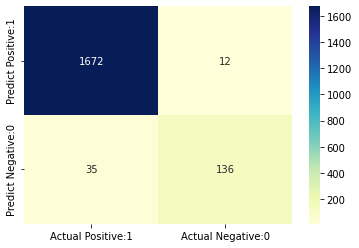

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## classification metrices

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1684
         1.0       0.92      0.80      0.85       171

    accuracy                           0.97      1855
   macro avg       0.95      0.89      0.92      1855
weighted avg       0.97      0.97      0.97      1855



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9747


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0253


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9929


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9795


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9795


In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0811


In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9189


## ROC - AUC 

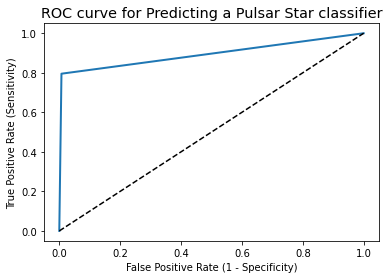

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8941


In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9731


## Stratified k-fold Cross Validation with shuffle split

In [ ]:
# Stratified k-Fold Cross Validation with shuffle split with linear kernel

from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [ ]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.97466307 0.97951482 0.98221024 0.9768069  0.97842503]


In [ ]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9783


In [ ]:
# Stratified k-Fold Cross Validation with shuffle split with rbf kernel

rbf_svc=SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [ ]:
# print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[0.96765499 0.97250674 0.97520216 0.97303128 0.97141316]


In [ ]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9720


## Hyperparameter Optimization using GridSearch CV

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9795


Parameters that give the best results : 

 {'C': 10, 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=10, kernel='linear')


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9747
